<a href="https://colab.research.google.com/github/ShadowMonarch001/ML/blob/main/Naive%20Bayes/ML04_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/breastcancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.shape

(569, 33)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Data Pre-Processiong

---



<Axes: >

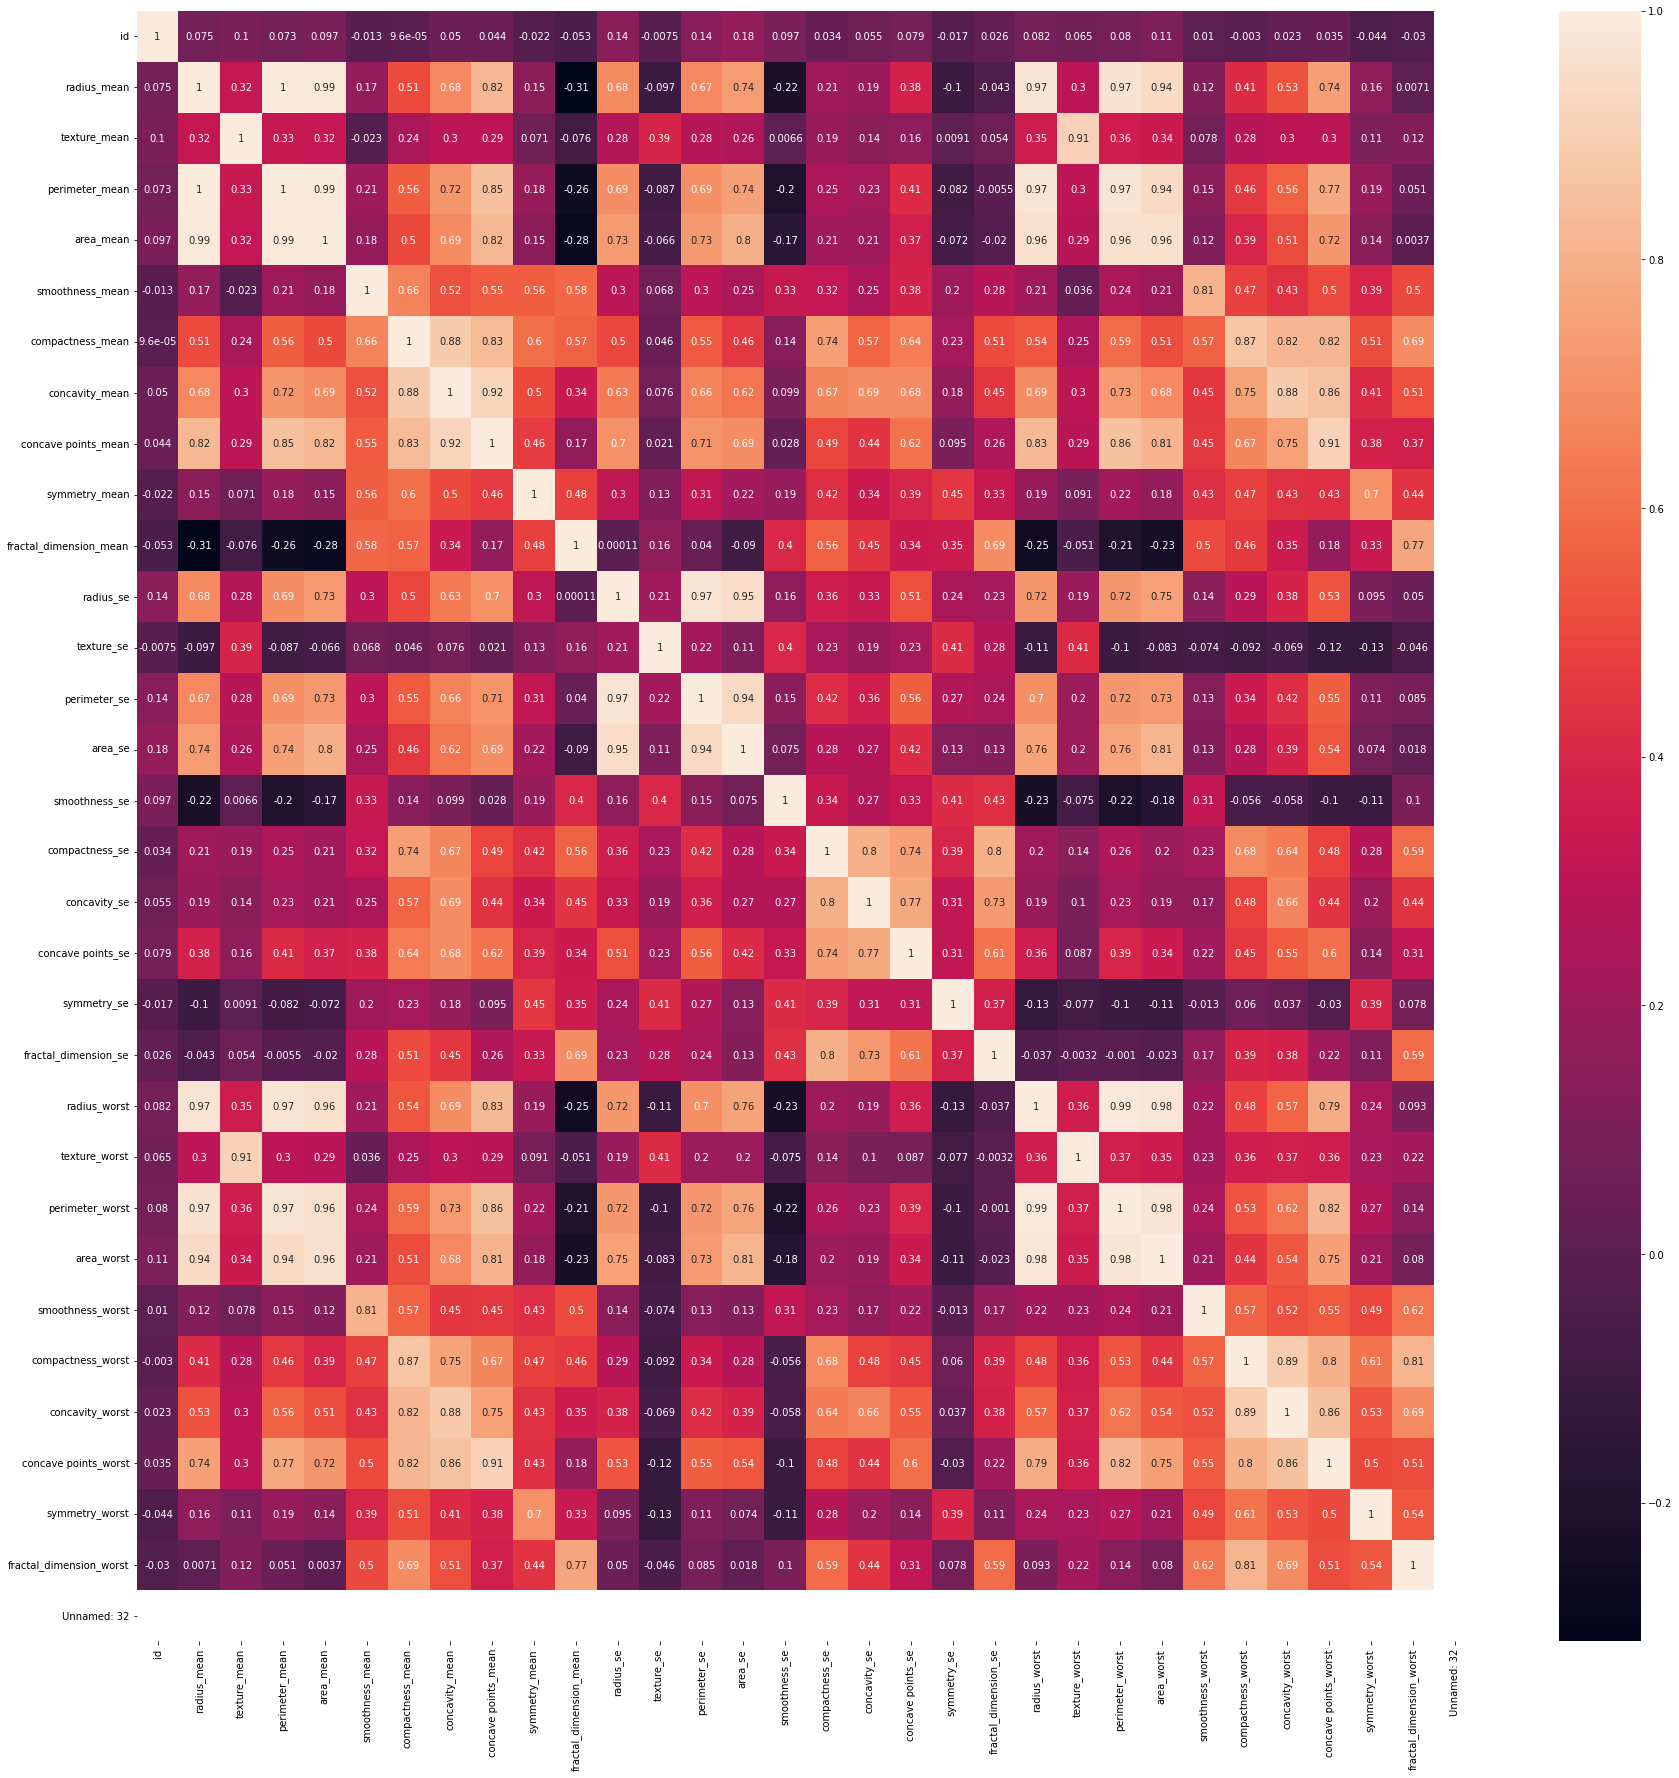

In [ ]:
fig = plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True)

In [ ]:
df=pd.DataFrame(data)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
Y=df['diagnosis']
Y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [ ]:
print(Y.unique())
print(Y.nunique())

['M' 'B']
2


In [ ]:
X=df.drop(['id','diagnosis'],axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
X.drop(to_drop, axis=1, inplace=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   radius_mean      569 non-null    float64
 1   texture_mean     569 non-null    float64
 2   smoothness_mean  569 non-null    float64
 3   texture_se       569 non-null    float64
 4   smoothness_se    569 non-null    float64
 5   symmetry_se      569 non-null    float64
 6   Unnamed: 32      0 non-null      float64
dtypes: float64(7)
memory usage: 31.2 KB


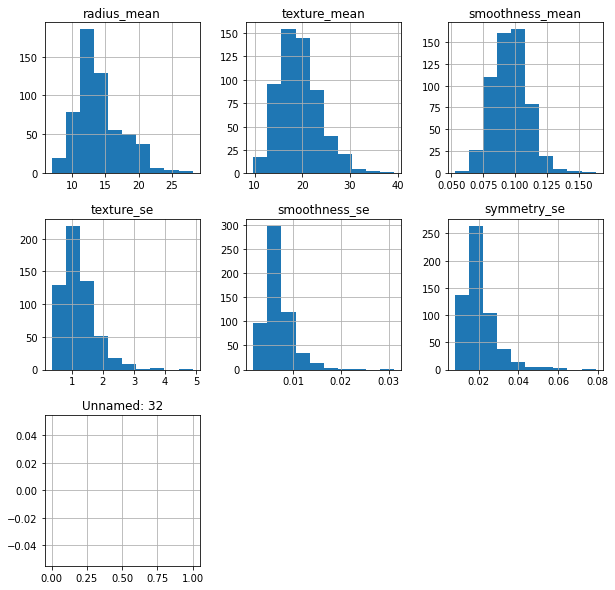

In [ ]:
X.hist(figsize=(10,10))
plt.show()

In [ ]:
X.drop(['texture_se','smoothness_se','symmetry_se','Unnamed: 32'],axis=1,inplace=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   radius_mean      569 non-null    float64
 1   texture_mean     569 non-null    float64
 2   smoothness_mean  569 non-null    float64
dtypes: float64(3)
memory usage: 13.5 KB


In [ ]:
DF=X
DF['diagnosis']=Y
DF['diagnosis'] = df['diagnosis'].map({'M':0 ,'B':1})
DF

,radius_mean,texture_mean,smoothness_mean,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
...,...,...,...,...
564,21.56,22.39,0.11100,0
565,20.13,28.25,0.09780,0
566,16.60,28.08,0.08455,0
567,20.60,29.33,0.11780,0


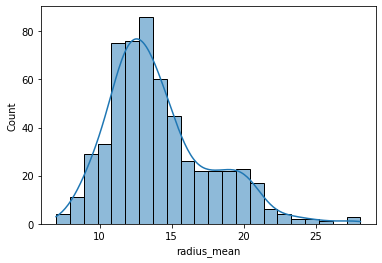

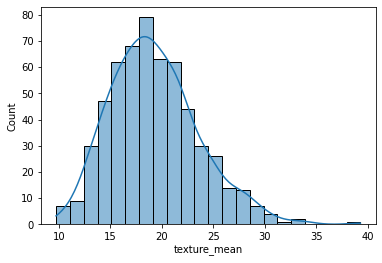

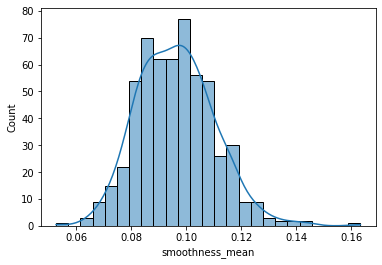

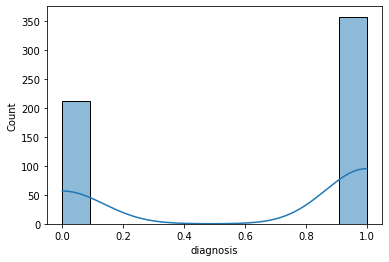

In [ ]:
for i,col in enumerate(DF.describe().columns):
  plt.figure(i)
  sns.histplot(DF[col], kde=True)

# Calculate P(Y=y) for all possible y

---



In [ ]:
def calculate_prior(df, Y):
  classes = sorted(list(df[Y].unique()))
  prior = []
  for i in classes:
      prior.append(len(df[df[Y]==i])/len(df))
  return prior

# Calculate P(X=x|Y=y) using Gaussian dist.

---



In [ ]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
  feat = list(df.columns)
  df = df[df[Y]==label]
  mean, std = df[feat_name].mean(), df[feat_name].std()
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
  return p_x_given_y

# Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

---



In [ ]:
def naive_bayes_gaussian(df, X, Y):
  # get feature names
  features = list(df.columns)[:-1]

  # calculate prior
  prior = calculate_prior(df, Y)

  Y_pred = []
  # loop over every data sample
  for x in X:
      # calculate likelihood
      labels = sorted(list(df[Y].unique()))
      likelihood = [1]*len(labels)
      for j in range(len(labels)):
          for i in range(len(features)):
              likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

      # calculate posterior probability (numerator only)
      post_prob = [1]*len(labels)
      for j in range(len(labels)):
          post_prob[j] = likelihood[j] * prior[j]

      Y_pred.append(np.argmax(post_prob))

  return np.array(Y_pred) 

# Test Gaussian model

---



In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(DF, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
print(f"testing accuracy = {accuracy_score(Y_test,Y_pred)}")

testing accuracy = 0.9649122807017544


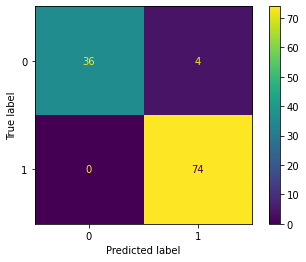

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        40
           1       0.95      1.00      0.97        74

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

